# Exploratory Data Analysis
With our cleaned data, we'll have to inspect and see if our variables has any form of correlation with it being a potential award winner

In [4]:
#Import of Basic Libraries
#Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import io
sb.set()

In [5]:
movieDB = pd.read_csv('Data_Cleaning/allCleanedMovieData.csv')
movieDB = movieDB[['id','original_title','budget','revenue','release_date','popularity.1','vote_average','runtime','top_casts_popularity_avg','casts_popularity_sum','top_cast_popularity','top_crews_popularity_avg','crews_popularity_sum','top_crew_popularity','percentage_revenue','Won']]
movieDB.head()

,id,original_title,budget,revenue,release_date,popularity.1,vote_average,runtime,top_casts_popularity_avg,casts_popularity_sum,top_cast_popularity,top_crews_popularity_avg,crews_popularity_sum,top_crew_popularity,percentage_revenue,Won
0,5,Four Rooms,4000000.0,4257354.0,1995.0,22.784,5.744,98.0,32.033857,362.055,36.681,15.715714,225.920,27.939,106.43,False
1,6,Judgment Night,21000000.0,12136938.0,1993.0,11.530,6.543,109.0,14.834857,124.008,23.049,3.600143,32.165,5.436,57.79,False
2,11,Star Wars,11000000.0,775398007.0,1977.0,86.624,8.207,121.0,17.367714,297.868,37.206,7.543000,121.872,10.994,7049.07,True
3,12,Finding Nemo,94000000.0,940335536.0,2003.0,99.340,7.824,100.0,23.006429,467.094,41.251,8.758000,404.117,14.186,1000.36,True
4,13,Forrest Gump,55000000.0,677387716.0,1994.0,68.192,8.481,142.0,32.837571,526.057,99.618,6.422000,224.432,11.735,1231.61,True


In [14]:
# Rename poplarity and Won
movieDB.rename(columns={'popularity.1':'popularity', 'Won':'won'}, inplace=True)

### Taking a look at the data

In [15]:
movieDB.describe()

,id,budget,revenue,release_date,popularity,vote_average,runtime,top_casts_popularity_avg,casts_popularity_sum,top_cast_popularity,top_crews_popularity_avg,crews_popularity_sum,top_crew_popularity,percentage_revenue
count,9.612000e+03,7.745000e+03,8.150000e+03,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9.612000e+03
mean,1.452000e+05,2.850489e+07,7.609354e+07,2002.625780,23.741928,6.472771,107.175094,16.616430,185.547788,35.853395,4.877282,79.395424,11.620549,1.711006e+04
std,2.119955e+05,4.063822e+07,1.615389e+08,16.213694,63.312839,0.859886,21.876248,11.328741,139.328648,44.361807,4.167592,77.803377,14.035509,1.577199e+06
min,5.000000e+00,1.000000e+00,1.000000e+00,1927.000000,3.923000,1.200000,4.000000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.000000e+00
25%,1.010450e+04,5.000000e+06,4.662478e+06,1995.000000,10.855750,5.935750,94.000000,8.736173,87.960500,16.987250,2.225071,29.032500,3.824750,1.436275e+02
50%,2.354250e+04,1.500000e+07,2.114160e+07,2007.000000,14.611000,6.500000,104.000000,15.082000,157.385000,29.214000,3.603857,54.157000,6.545000,2.066700e+02
75%,2.565032e+05,3.500000e+07,7.345528e+07,2015.000000,22.683000,7.095250,117.000000,22.129107,248.746000,44.258000,6.102786,105.107500,13.114000,2.840175e+02
max,1.028463e+06,1.000000e+09,2.920357e+09,2022.000000,4849.849000,8.712000,432.000000,160.377143,2088.830000,953.945000,64.027714,915.575000,140.197000,1.545930e+08


In [17]:
movieDB['won'].value_counts()

False    9016
True      596
Name: won, dtype: int64

## Explore the dataset
We want to explore the data set to see what kind of variables have a large correlation to the movie winning an oscar

In [18]:
print(movieDB.dtypes)

id                            int64
original_title               object
budget                      float64
revenue                     float64
release_date                float64
popularity                  float64
vote_average                float64
runtime                     float64
top_casts_popularity_avg    float64
casts_popularity_sum        float64
top_cast_popularity         float64
top_crews_popularity_avg    float64
crews_popularity_sum        float64
top_crew_popularity         float64
percentage_revenue          float64
won                            bool
dtype: object


### Visualising the TheMovieDB data

<AxesSubplot:xlabel='percentage_revenue', ylabel='won'>

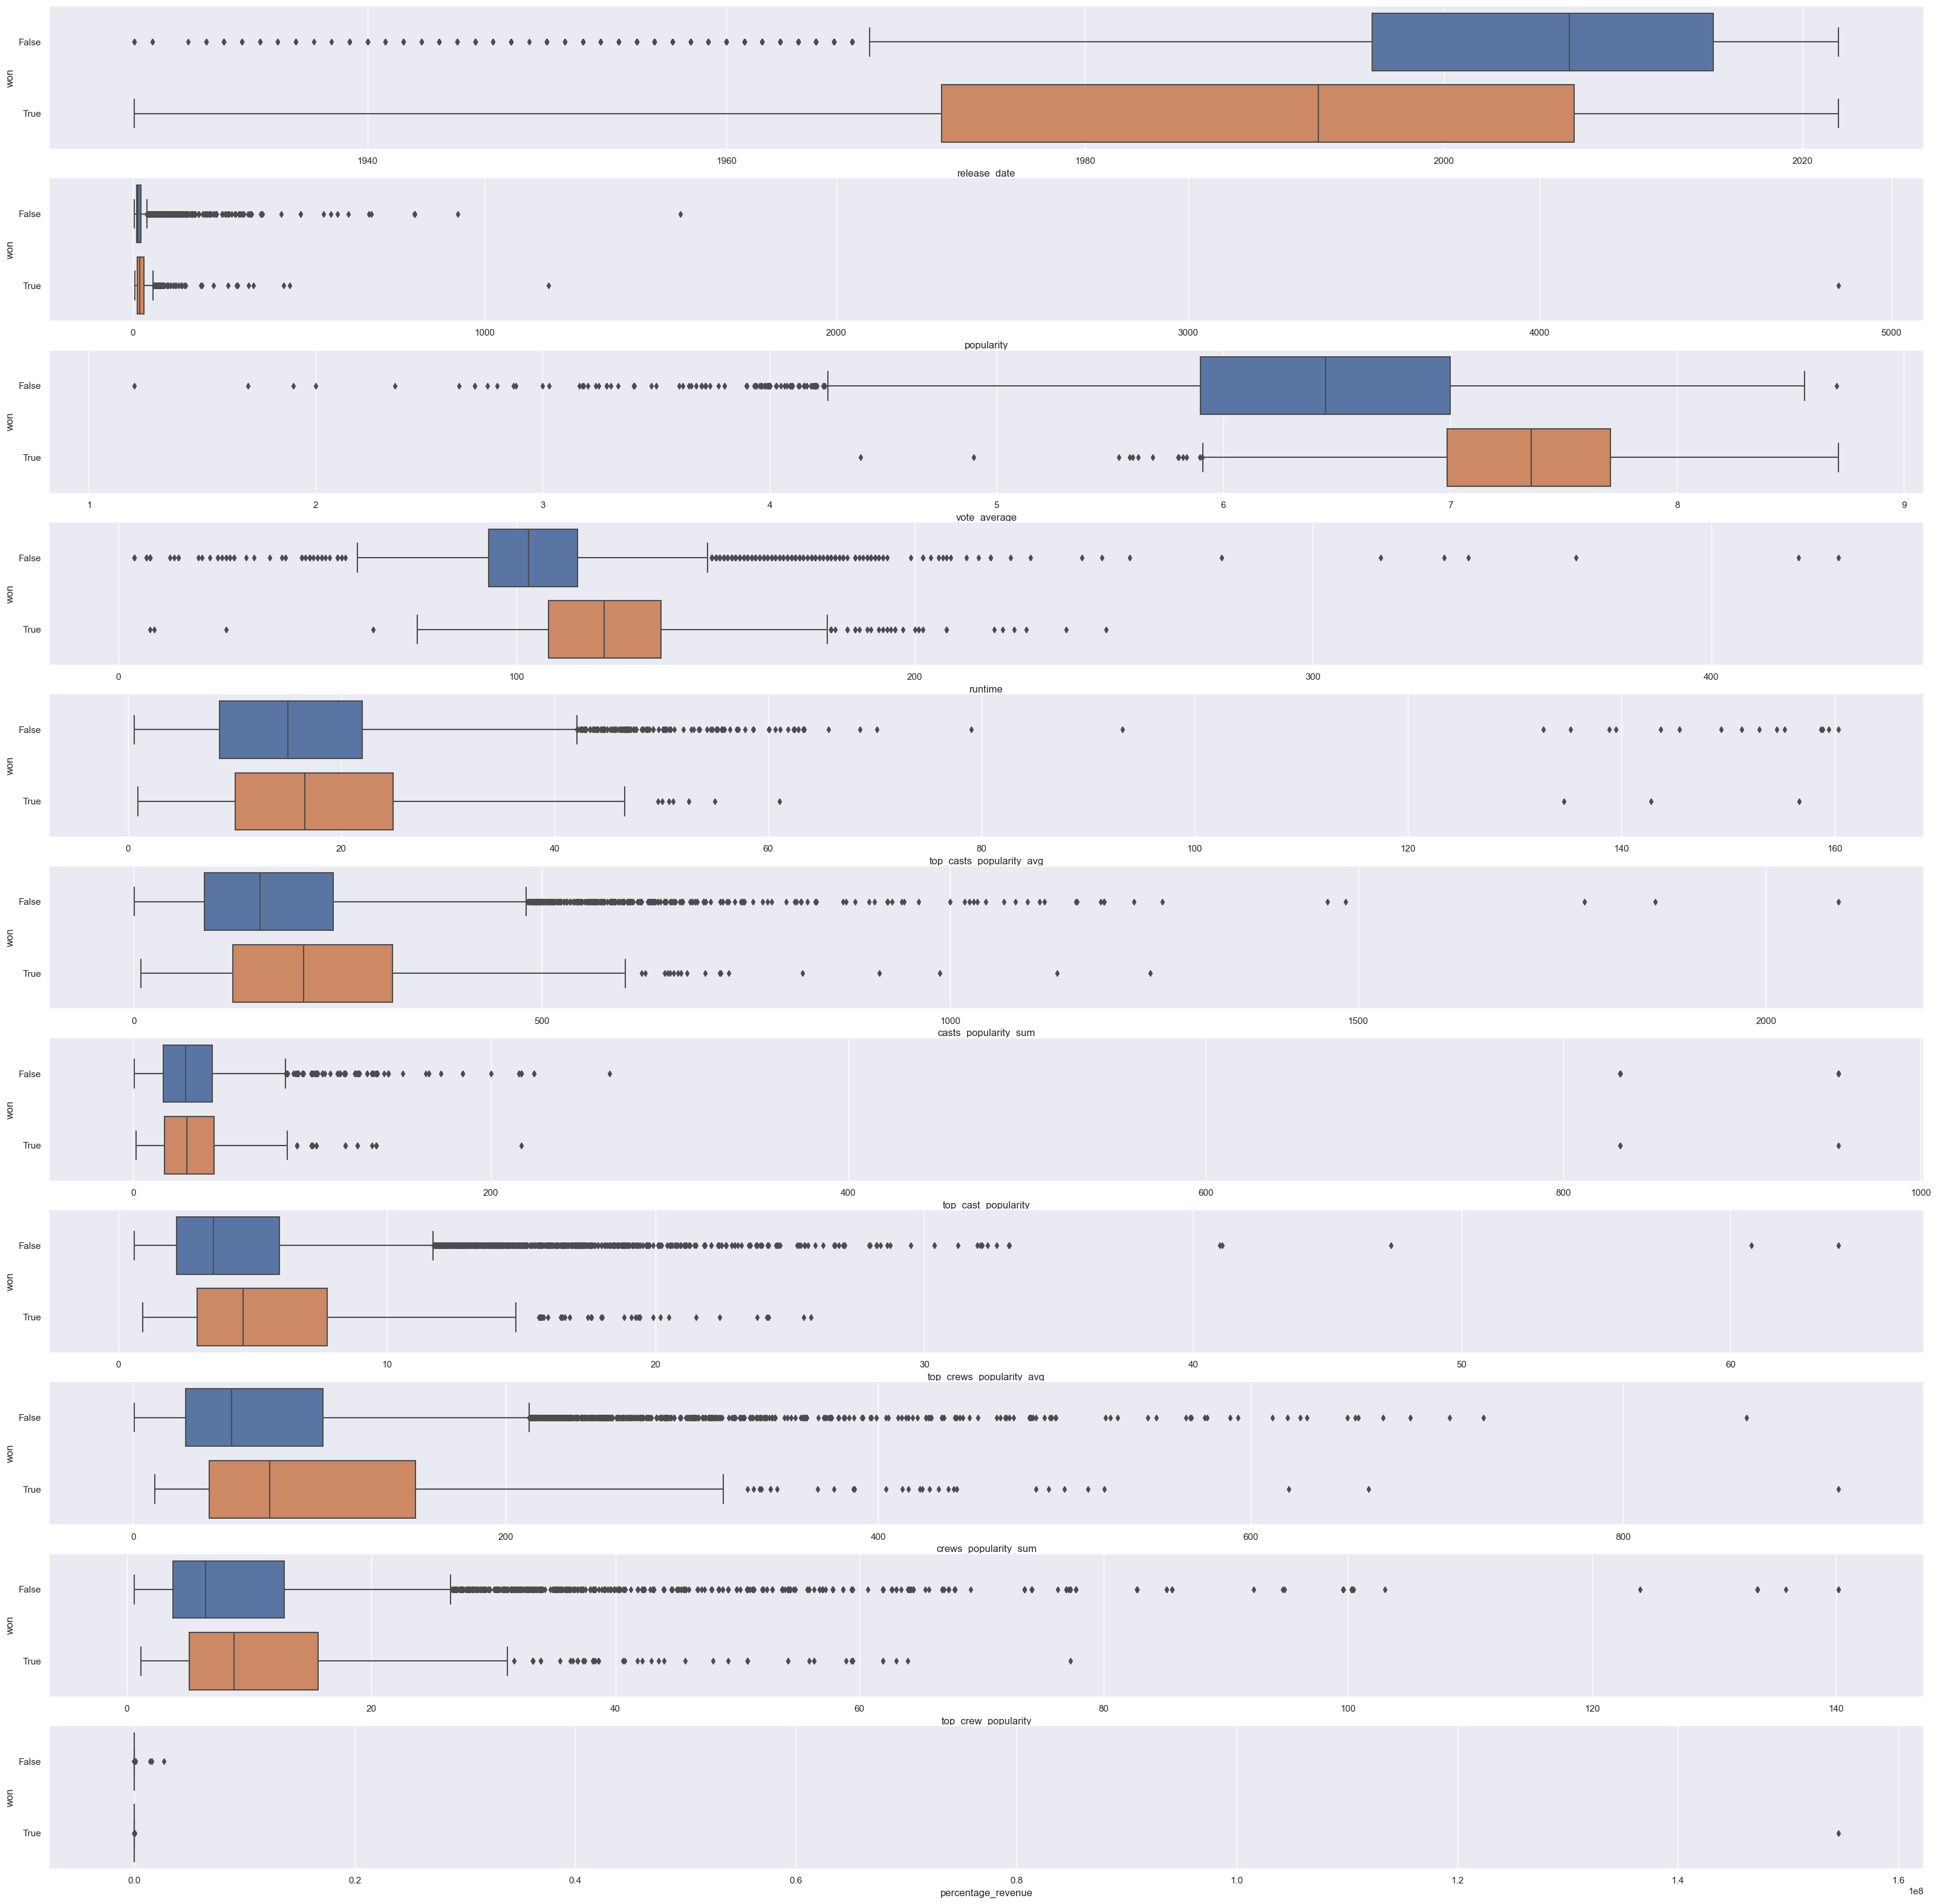

In [20]:
f,axes = plt.subplots(11,1,figsize=(40,40))
sb.boxplot(x='release_date',y='won',data=movieDB[['release_date','won']],ax=axes[0],orient='h')
sb.boxplot(x='popularity',y='won',data=movieDB[['popularity','won']],ax=axes[1],orient='h')
sb.boxplot(x='vote_average',y='won',data=movieDB[['vote_average','won']],ax=axes[2],orient='h')
sb.boxplot(x='runtime',y='won',data=movieDB[['runtime','won']],ax=axes[3],orient='h')
sb.boxplot(x='top_casts_popularity_avg',y='won',data=movieDB[['top_casts_popularity_avg','won']],ax=axes[4],orient='h')
sb.boxplot(x='casts_popularity_sum',y='won',data=movieDB[['casts_popularity_sum','won']],ax=axes[5],orient='h')
sb.boxplot(x='top_cast_popularity',y='won',data=movieDB[['top_cast_popularity','won']],ax=axes[6],orient='h')
sb.boxplot(x='top_crews_popularity_avg',y='won',data=movieDB[['top_crews_popularity_avg','won']],ax=axes[7],orient='h')
sb.boxplot(x='crews_popularity_sum',y='won',data=movieDB[['crews_popularity_sum','won']],ax=axes[8],orient='h')
sb.boxplot(x='top_crew_popularity',y='won',data=movieDB[['top_crew_popularity','won']],ax=axes[9],orient='h')
sb.boxplot(x='percentage_revenue',y='won',data=movieDB[['percentage_revenue','won']],ax=axes[10],orient='h')

We can see that the variables "release_date", "vote_average", "runtime", "casts_popularity_sum", "top_crews_popularity_avg", "crews_popularity_sum" and "top_crew_popularity" have obvious difference in median between "False" category and "True" category while the remaining variables do not show any obvious difference. This means that the above stated variables could potentially be useful as predictors to whether a movie will win an Oscar.

We will do more exploratory analysis to confirm our guess

<AxesSubplot:xlabel='percentage_revenue', ylabel='Won'>

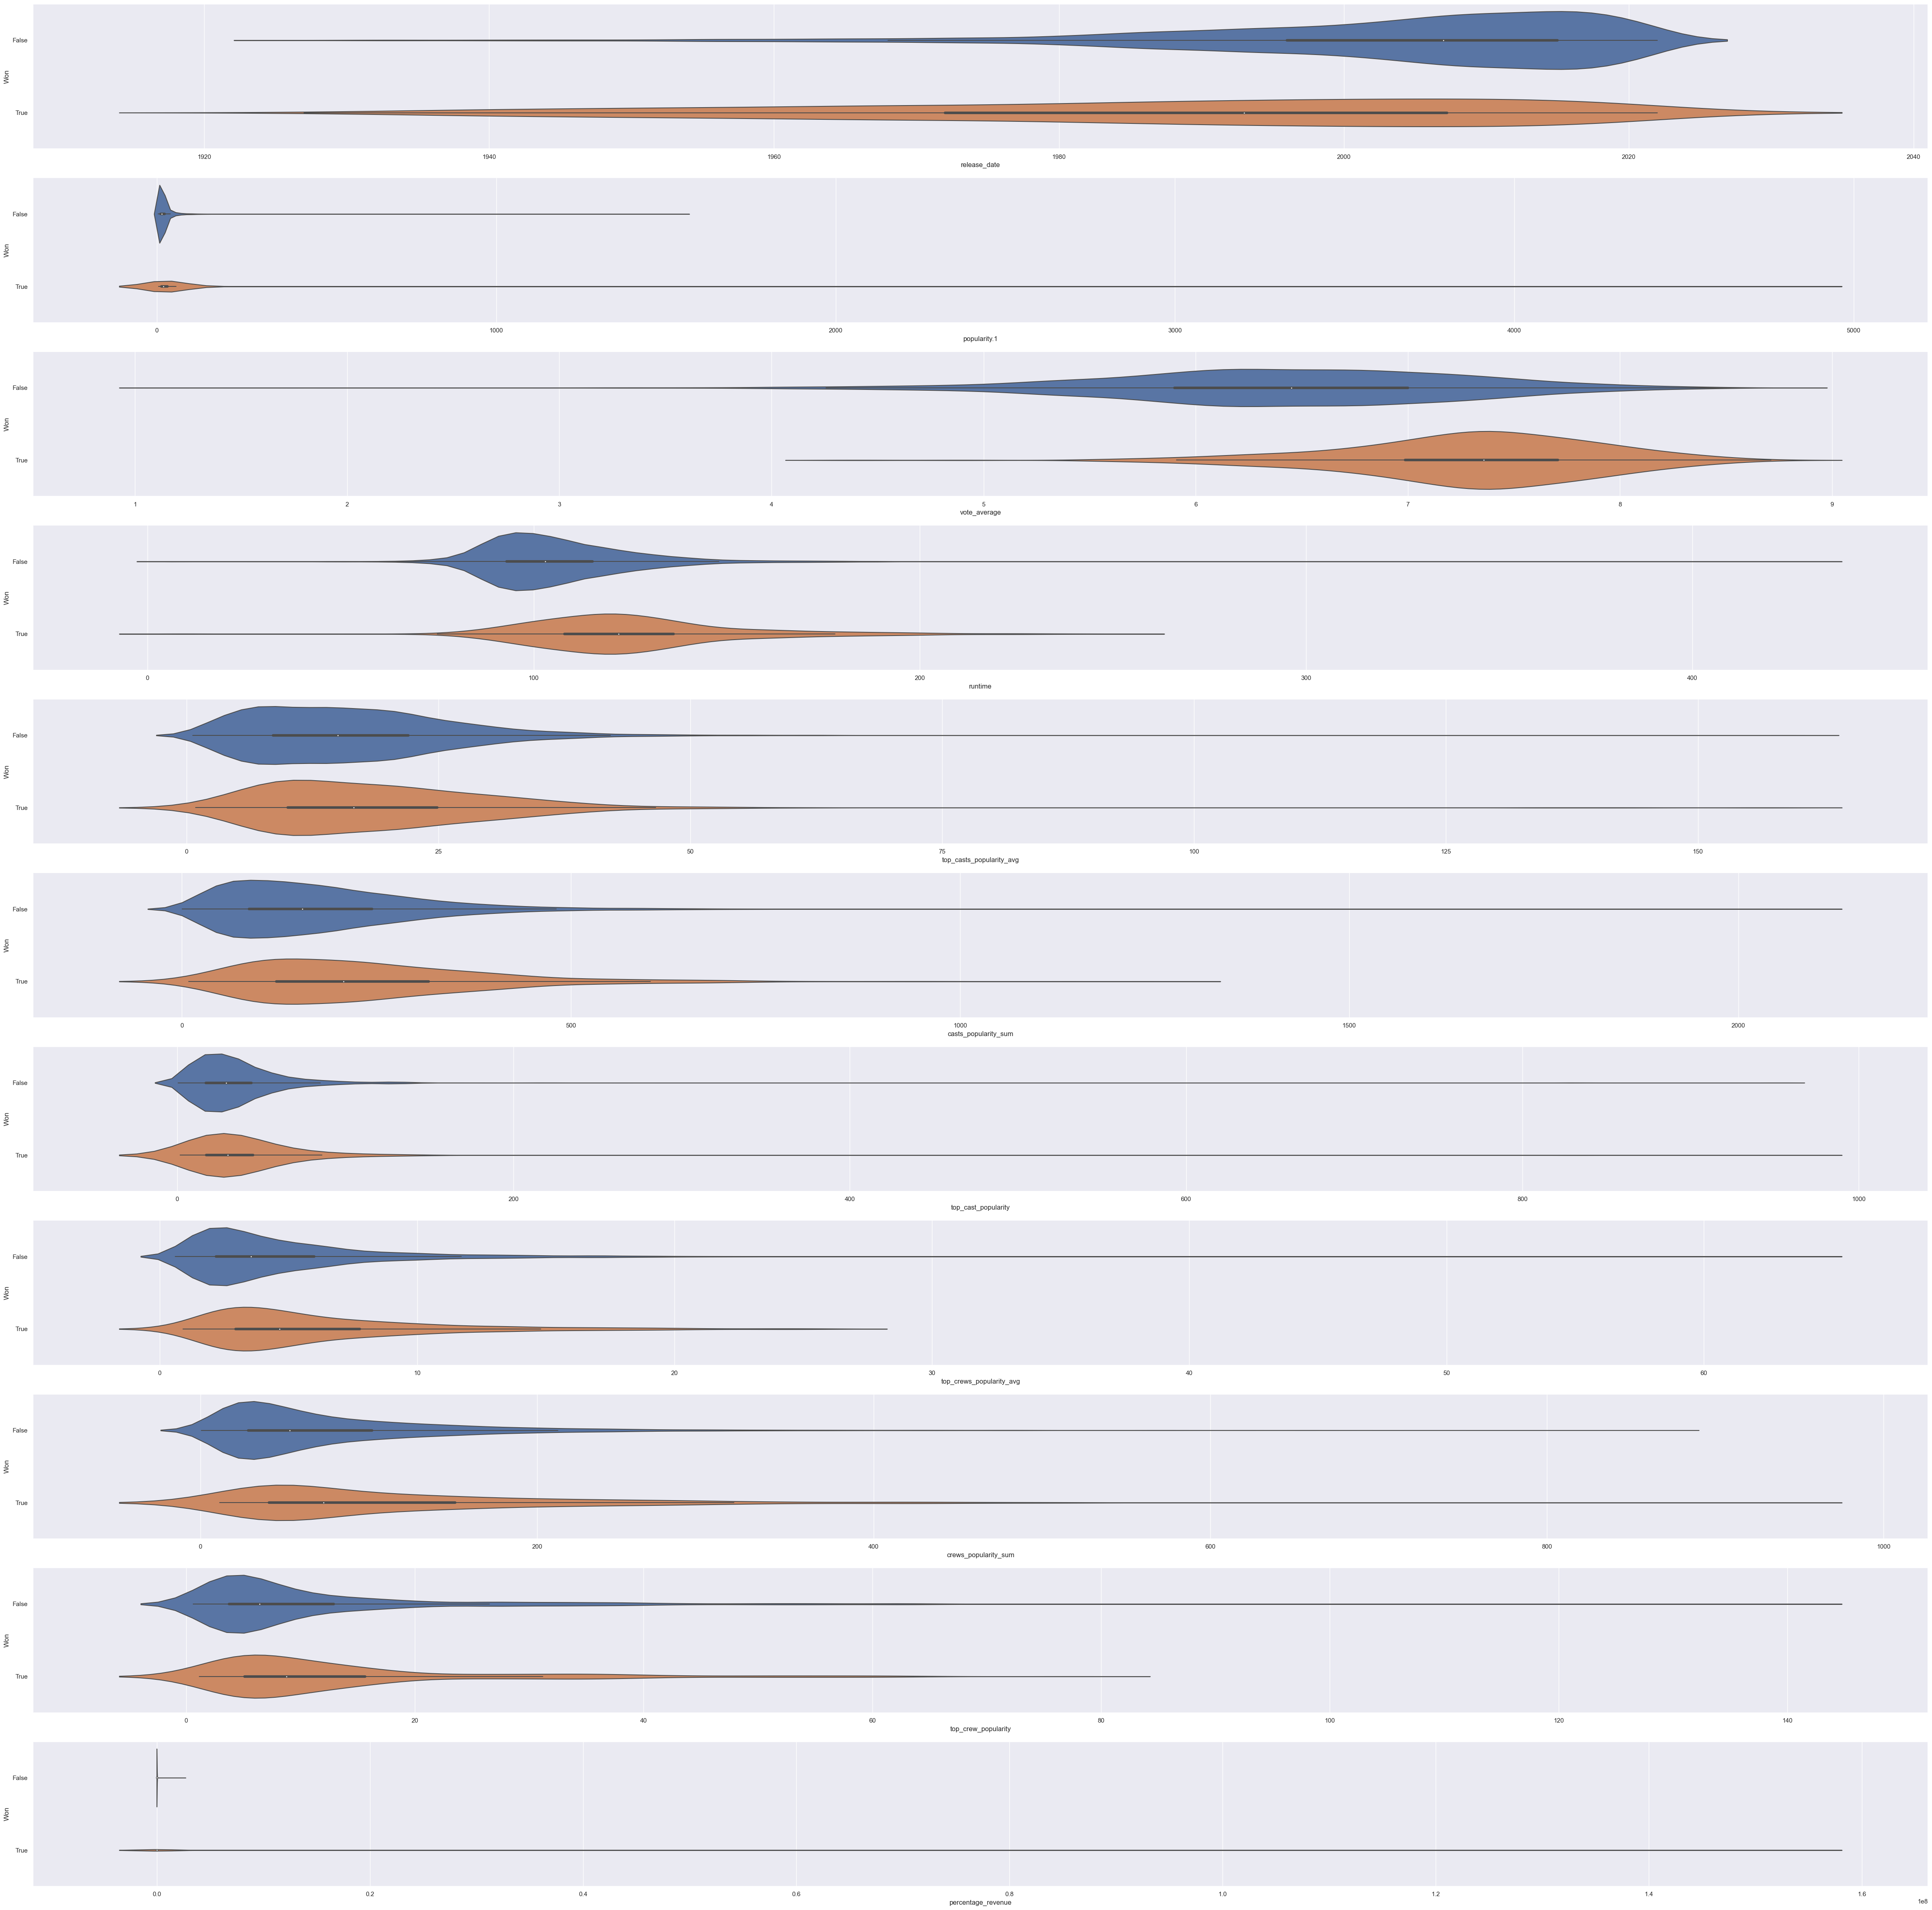

In [11]:
#create violin plot for every variable
f,axes = plt.subplots(11,1,figsize=(60,60))
sb.violinplot(x='release_date',y='Won',data=movieDB[['release_date','Won']],ax=axes[0],orient='h')
sb.violinplot(x='popularity.1',y='Won',data=movieDB[['popularity.1','Won']],ax=axes[1],orient='h')
sb.violinplot(x='vote_average',y='Won',data=movieDB[['vote_average','Won']],ax=axes[2],orient='h')
sb.violinplot(x='runtime',y='Won',data=movieDB[['runtime','Won']],ax=axes[3],orient='h')
sb.violinplot(x='top_casts_popularity_avg',y='Won',data=movieDB[['top_casts_popularity_avg','Won']],ax=axes[4],orient='h')
sb.violinplot(x='casts_popularity_sum',y='Won',data=movieDB[['casts_popularity_sum','Won']],ax=axes[5],orient='h')
sb.violinplot(x='top_cast_popularity',y='Won',data=movieDB[['top_cast_popularity','Won']],ax=axes[6],orient='h')
sb.violinplot(x='top_crews_popularity_avg',y='Won',data=movieDB[['top_crews_popularity_avg','Won']],ax=axes[7],orient='h')
sb.violinplot(x='crews_popularity_sum',y='Won',data=movieDB[['crews_popularity_sum','Won']],ax=axes[8],orient='h')
sb.violinplot(x='top_crew_popularity',y='Won',data=movieDB[['top_crew_popularity','Won']],ax=axes[9],orient='h')
sb.violinplot(x='percentage_revenue',y='Won',data=movieDB[['percentage_revenue','Won']],ax=axes[10],orient='h')


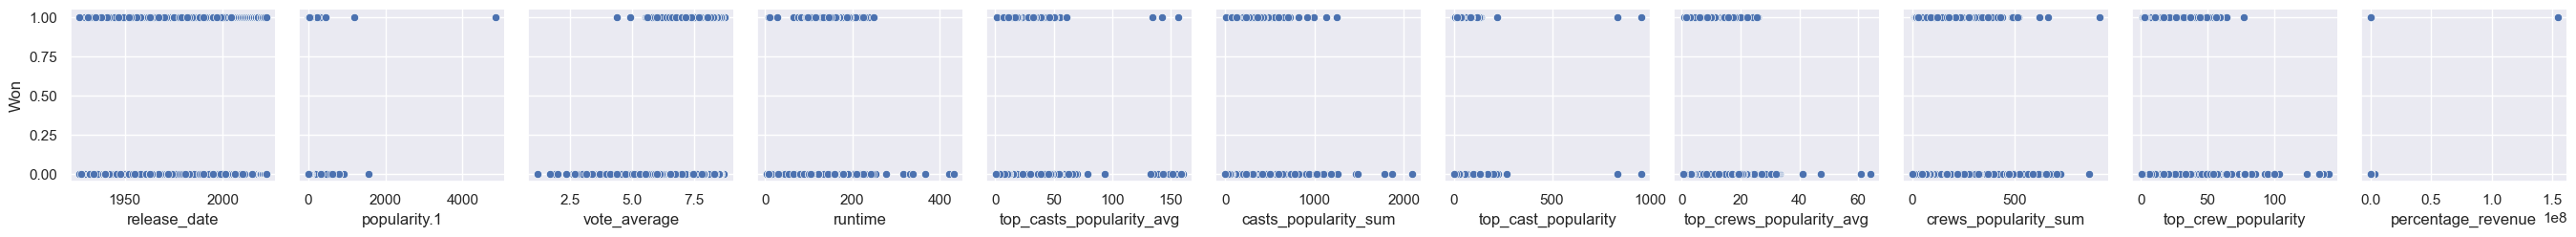

In [13]:
# Print Pairplot
sb.pairplot(data=movieDB, y_vars= ['Won'], x_vars = ['release_date','popularity.1','vote_average','runtime','top_casts_popularity_avg','casts_popularity_sum','top_cast_popularity','top_crews_popularity_avg','crews_popularity_sum','top_crew_popularity','percentage_revenue'])

<AxesSubplot:>

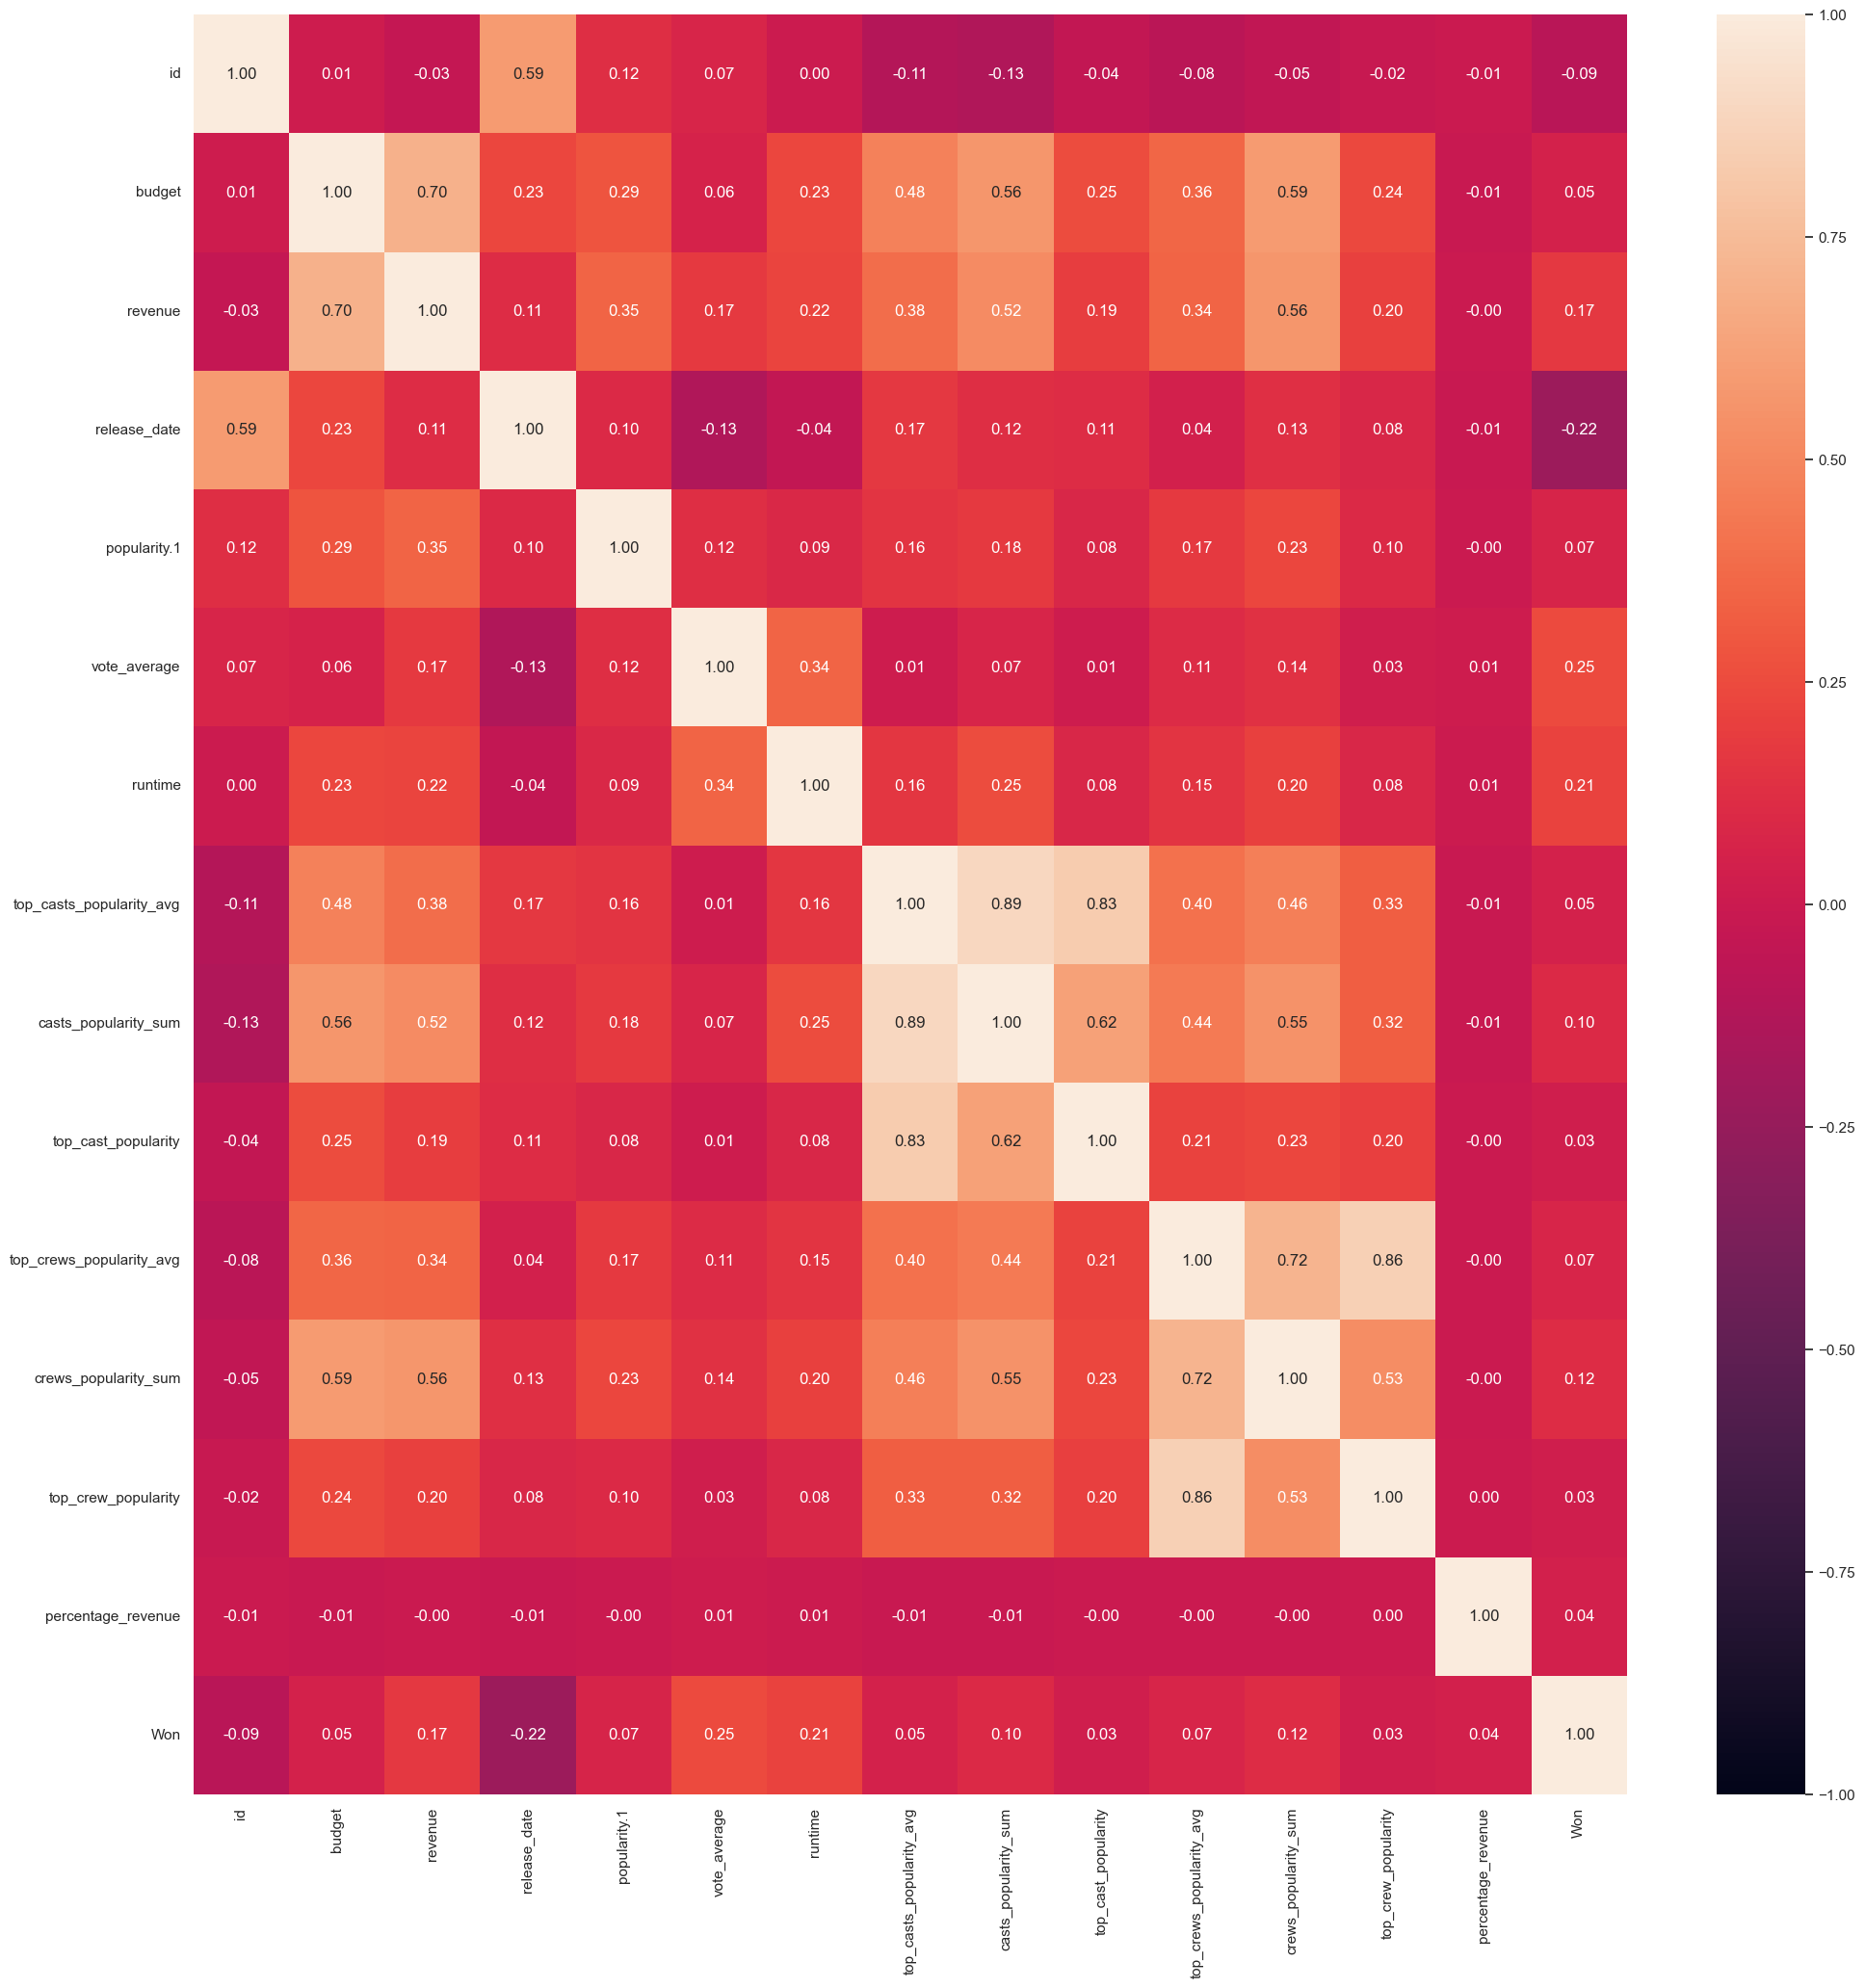

In [10]:
f = plt.figure(figsize=(24,24))
sb.heatmap(movieDB.corr(), vmin=-1, vmax = 1, annot = True, fmt=".2f")

We can see that the following variables have some form of correlation (r < -0.1 or r > 0.1) with the movie winning; "revenue", "release_date", "vote_average", "runtime", "cast_popularity_sum" & "crew_popularity_sum" which coincide with some of the variables we pointed out above. Hence we will be using these variables when doing our classification except "revenue" since it has been replaced by "percentage_revenue" for reasons stated previously in Data Cleaning notebook